In [4]:
import os.path
import numpy as np
import pandas as pd


def read_registration_error(rigid_folder, deformable_folder):
    
    reg_error_df = pd.DataFrame(columns = ['Error', 'Method'])

    # read rigid
    filename = os.path.join(rigid_folder, 'distance_error.csv')
    print(filename)
    if os.path.exists(filename):
        err = np.genfromtxt(filename, delimiter=',')
        method = ['Rigid']*len(err)
        s_err = pd.Series(err, name='Error')
        s_method = pd.Series(method, name ='Method')
        df = pd.concat([s_err, s_method], axis=1)
        reg_error_df = reg_error_df.append(df, ignore_index=True)
    print(reg_error_df.head(3))
    
    
    # read deformable
    filename = os.path.join(deformable_folder, 'distance_error.csv')
    print(filename)
    if os.path.exists(filename):
        err = np.genfromtxt(filename, delimiter=',')
        method = ['MIND Demons']*len(err)
        s_err = pd.Series(err, name='Error')
        s_method = pd.Series(method, name ='Method')
        df = pd.concat([s_err, s_method], axis=1)
        reg_error_df = reg_error_df.append(df, ignore_index=True)
    print(reg_error_df.head(3))
    
    return reg_error_df
        

In [45]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def registration_error_boxplot(reg_error_df, image_folder = None, ystep =0.005,ymin = 0.0, ymax = 0.02, \
                               figw = 5, figh = 6,font_size = 14, width = 0.4):

    sns.set('paper', style="white", color_codes=True, font='Arial', font_scale = 1)

    fig, ax= plt.subplots(sharey=True, figsize=(figw, figh)) 

    ax.set(ylim=(ymin, ymax))

    flierprops = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')
    
    #sns.cubehelix_palette(3, start=0.4, rot=-.75)
    #palette='Blues'
    sns.boxplot(x="Method", y="Error", data=reg_error_df, color="white", palette='Blues',width=width,\
                fliersize = 3,flierprops=flierprops, showfliers = True, ax=ax)

    ax.set_xlabel('Registration methods', size = font_size,alpha=1.0)
    ax.set_yticks(np.arange(ymin, ymax+ystep, ystep))
    ax.set_yticklabels(np.arange(ymin, ymax+ystep, ystep)*1000.)
    ax.set_ylabel('Registration error (${\mu}$m)',size = font_size,alpha=1.0)

    plt.xticks(rotation=0) 
    ax.tick_params(labelsize=font_size,labelcolor="black") 

    for i,artist in enumerate(ax.artists):
        artist.set_facecolor((0.7,0.8,0.9,0.8))#('xkcd:baby blue')
        #artist.set_edgecolor('black')
        artist.set_linewidth(2)
        
        cnt = 0
        for j in range(i*6,i*6+6):
            #line = ax.lines[j]
            #line.set_color('k')            
            if cnt == 4:
                line = ax.lines[j]
                line.set_color('w')
            cnt+=1

    plt.tight_layout()

    if image_folder:
        image_file = image_folder+'\\registration_error.png';
        fig.savefig(image_file, dpi=300)
        

C:\D\dev\data\20170801_spect_to_cirr_demons\spect_to_cirr_left_healthy\distance_error.csv
   Error Method
0  0.024  Rigid
1  0.024  Rigid
2  0.020  Rigid
C:\D\dev\data\20170801_spect_to_cirr_demons\demons_mind\distance_error.csv
   Error Method
0  0.024  Rigid
1  0.024  Rigid
2  0.020  Rigid


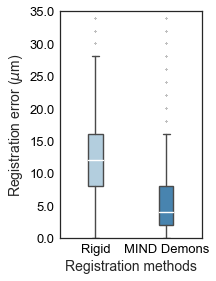

In [14]:
mainfolder = 'C:\\D\\dev\\data\\20170801_spect_to_cirr_demons'
rigid_folder = '\\'.join([mainfolder, 'spect_to_cirr_left_healthy'])
deformable_folder = '\\'.join([mainfolder, 'demons_mind'])

reg_error_df = read_registration_error(rigid_folder, deformable_folder)

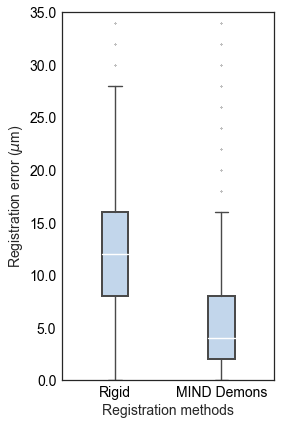

In [46]:
ystep, ymin, ymax =0.005, 0.0, 0.035
figw, figh = 4,6
font_size = 14
width = 0.25
registration_error_boxplot(reg_error_df, mainfolder, ystep ,ymin, ymax, figw, figh,font_size, width)